In [1]:
import cv2
import numpy as np
import dlib
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
predictor5_path = "./shape_predictor_5_face_landmarks.dat"
predictor68_path = "./shape_predictor_68_face_landmarks.dat"
face_rec_model_path = "./dlib_face_recognition_resnet_model_v1.dat"

detector = dlib.get_frontal_face_detector()
sp5 = dlib.shape_predictor(predictor68_path)
sp68 = dlib.shape_predictor(predictor68_path)
facerec = dlib.face_recognition_model_v1(face_rec_model_path)

In [9]:
feats = []

In [31]:
photo_path = "./P1180607.JPG"

In [32]:
orig = cv2.imread(photo_path)                        # Read image
# im = cv2.resize(im, (960, 540))                    # Resize image
# im = cv2.resize(im, None, fx=0.3, fy=0.3)
# cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)

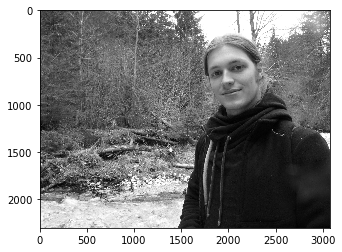

In [ ]:
# plt.imshow(cv2.cvtColor(im, cv2.COLOR_GRAY2RGB))

In [34]:
dets = detector(im, 1)

In [35]:
len(dets)

1

In [36]:
for d in dets:
    # TODO: what if there are two faces in one pic?
    print(d)
    cur_feat = []
    x_l = d.left()
    x_r = d.right()
    y_t = d.top()
    y_b = d.bottom()

    
    width = x_r - x_l
    height = y_b - y_t
#     cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 255, 0), im.shape[0]//150)
    shape = sp68(im, d)
    for i in range(0, 68):
        # TODO: normalize to 0 mean? How?
        feat_x = (shape.part(i).x - x_l) / width
        feat_y = (shape.part(i).y - y_t) / height
        cur_feat.append(feat_x)
        cur_feat.append(feat_y)
        
#         cv2.circle(orig, (shape.part(i).x, shape.part(i).y), 1, (255, 0, 0), im.shape[0]//150)
    feats.append(cur_feat)
print(feats)

[(1712, 480) (2267, 1035)]
[[0.25806451612903225, 0.36129032258064514, 0.24516129032258063, 0.45806451612903226, 0.24516129032258063, 0.567741935483871, 0.25806451612903225, 0.6774193548387096, 0.27741935483870966, 0.7870967741935484, 0.3032258064516129, 0.8903225806451613, 0.34838709677419355, 0.9870967741935484, 0.3935483870967742, 1.064516129032258, 0.49032258064516127, 1.0903225806451613, 0.6064516129032258, 1.0838709677419356, 0.7290322580645161, 1.032258064516129, 0.8451612903225807, 0.967741935483871, 0.9548387096774194, 0.8838709677419355, 1.0258064516129033, 0.7870967741935484, 1.0580645161290323, 0.6709677419354839, 1.0838709677419356, 0.5419354838709678, 1.096774193548387, 0.41935483870967744, 0.2838709677419355, 0.2903225806451613, 0.3096774193548387, 0.25161290322580643, 0.36129032258064514, 0.23870967741935484, 0.4129032258064516, 0.24516129032258063, 0.4645161290322581, 0.2709677419354839, 0.5548387096774193, 0.2645161290322581, 0.6451612903225806, 0.23870967741935484, 0

In [38]:
from sklearn import svm

In [39]:
X_train = feats
y = [0, 1]

In [48]:
clf = svm.LinearSVC() # TODO: consider non-linear kernels: svm.SVC()

In [41]:
clf.fit(X_train, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [47]:
clf.predict([feats[1], feats[0]])

array([1, 0])